# Project #1 EDA

Ran Roffe & Nipun Ranchhod Navadia

## Step 1 - Understand the Dataset Context

### Step 1.1
Objective Clarification: Define the purpose of the analysis and the questions you aim to answer.

The purpose of this analysis is to gain crucial insights of the Electric Vehicle Poplulation in Washington using Exploratory Data Analysis.
<br>Our aim will be to answer the following questions:
1. Which car <b>manufacturers</b> are the most commonly used for EVs in Washington?
2. What are the <b>highest and lowest electric ranges</b> in this dataset, and which car
<b>makers and models</b> do they correspond to?
3. Is the <b>maximum electric range </b>value unique? If not, which cars share this range?
4. Is the <b>minimum electric range</b> value unique? If not, which cars share this range?
5. How does the <b>electric</b> range vary <b>between car makers and between models</b>?
6. Which are the top <b>5 cities</b> adopting EVs?
7. How does the EV adoption rate vary among car makers over the years?
8. Is there a correlation between the <b>electric range</b> and the <b>city </b>of an EV?
9. Which <b>county has the greatest</b> variety of <b> EV car models</b>?

### Step 1.2
Data Source Identification: Determine the source of the data, its collection methods, and any relevant background information.

#### Electric Vehicle Population Data in Washington State, USA (Dataset)
<br>Publisher: data.wa.gov
<br>Maintainer: Department of Licensing
<br>Source URL: https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
<br>Category: Transportation
<br>Public Access Leve: Public
<br>This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
<br>This CSV file contains 200,048 rows, each representing an electric vehicle. 
<br>The dataset includes the following columns: VIN, County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, and 2020 Census Tract.

## Step 2 - Import Libraries and Load Data

In [11]:
# !pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import plotly.express as px
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [13]:
data_path = '../Data/EV_Population_WA_Data.csv'
df = pd.read_csv(data_path)

## Step 3 - Initial Inspection

In [14]:
print(f"Number of Rows = {df.shape[0]} \nNumber of Columns = {df.shape[1]}")

Number of Rows = 200048 
Number of Columns = 17


In [15]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200048 non-null  object 
 1   County                                             200044 non-null  object 
 2   City                                               200044 non-null  object 
 3   State                                              200048 non-null  object 
 4   Postal Code                                        200044 non-null  float64
 5   Model Year                                         200048 non-null  int64  
 6   Make                                               200048 non-null  object 
 7   Model                                              200048 non-null  object 
 8   Electric Vehicle Type                              200048 non-null  object

In [17]:
numerical_cols = ['Model Year', 'Electric Range', 'Base MSRP']
df[numerical_cols].describe()

,Model Year,Electric Range,Base MSRP
count,200048.000000,200048.000000,200048.000000
mean,2020.871261,53.485279,947.551913
std,2.994933,88.786301,7860.591091
min,1997.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000
50%,2022.000000,0.000000,0.000000
75%,2023.000000,53.000000,0.000000
max,2025.000000,337.000000,845000.000000


### Missing Values

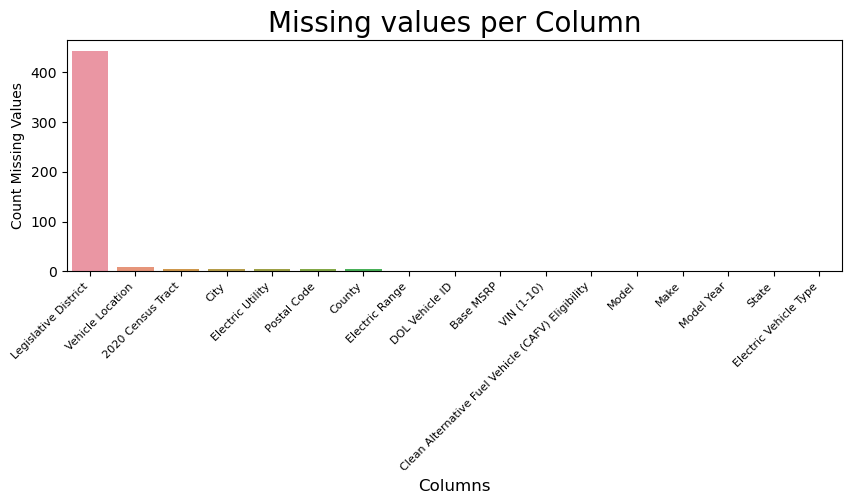

In [18]:
# check for missing values
plt.figure(figsize=(10,3))
sns.barplot(x=df.isnull().sum().sort_values(ascending=False).index, y=df.isnull().sum().sort_values(ascending=False))

# format figure
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel("Count Missing Values", fontsize=10)
plt.xlabel("Columns", fontsize=12)
plt.title("Missing values per Column", fontsize=20)
plt.show()

In [19]:
print("Normalized Missing Values:")
print(((df.isnull().mean().sort_values(ascending=False) * 100).round(2)).astype(str) + "%")

Normalized Missing Values:
Legislative District                                 0.22%
Vehicle Location                                      0.0%
2020 Census Tract                                     0.0%
City                                                  0.0%
Electric Utility                                      0.0%
Postal Code                                           0.0%
County                                                0.0%
Electric Range                                        0.0%
DOL Vehicle ID                                        0.0%
Base MSRP                                             0.0%
VIN (1-10)                                            0.0%
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0.0%
Model                                                 0.0%
Make                                                  0.0%
Model Year                                            0.0%
State                                                 0.0%
Electric Vehicle Type        

## Step 4 - Data Cleaning

### Step 4.1 - Handling Missing Data

In [20]:
cols_with_missing_values = df.columns[df.isnull().any()].tolist()
cols_with_missing_values.remove('Legislative District')
df.dropna(subset=cols_with_missing_values, inplace=True)

print("New shape: ", df.shape)
print(f"Missing value after removal: from {cols_with_missing_values}")
print(df.isnull().sum().sort_values(ascending=False))

New shape:  (200040, 17)
Missing value after removal: from ['County', 'City', 'Postal Code', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
Legislative District                                 438
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Utility                                       0
Vehicle Location                                       0
DOL Vehicle ID                                         0
Base MSRP                                              0
Electric Range                                         0
Electric Vehicle Type                                  0
County                                                 0
Model                                                  0
Make                                                   0
Model Year                                             0
Postal Code                                            0
State                                           

In [ ]:
knn_features = ["County", "City", "Postal Code"]
df_knn = df.copy()

# Encoding categorical variables as numbers
label_encoders = {}
for col in ["County", "City"]:
    le = LabelEncoder()
    df_knn[col] = le.fit_transform(df_knn[col].astype(str))
    label_encoders[col] = le

# Converting Legislative District to numeric (for imputation)
df_knn["Legislative District"] = pd.to_numeric(df_knn["Legislative District"], errors='coerce')

# Applying KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_knn[["Legislative District"]] = knn_imputer.fit_transform(df_knn[["Legislative District"]])

# Converting back to integer
df_knn["Legislative District"] = df_knn["Legislative District"].round().astype(int)


In [11]:
df[numerical_cols] = df[numerical_cols].astype('int64') # decalre only relevant column to be numeric
df[['Postal Code', '2020 Census Tract']] = df[['Postal Code', '2020 Census Tract']].astype('int64') # for later to be used as categories
df = df.apply(lambda x: x.astype(str) if x.name not in numerical_cols else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200040 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         200040 non-null  object
 1   County                                             200040 non-null  object
 2   City                                               200040 non-null  object
 3   State                                              200040 non-null  object
 4   Postal Code                                        200040 non-null  object
 5   Model Year                                         200040 non-null  int64 
 6   Make                                               200040 non-null  object
 7   Model                                              200040 non-null  object
 8   Electric Vehicle Type                              200040 non-null  object
 9   Clean Alt

#### Fill in missing Legislative District':
All states other than WA can be filled using ['County', 'State', 'City'].
1. Use above sequence to fill
2. Use KNN for the rest

In [12]:
state_related_cols = ['Legislative District', 'County', 'State', 'Postal Code', 'City']
ld_missing_df = df[df['Legislative District'].isnull()]


In [13]:
# Group by state, city, county, and postal code to see if legislative district is consistent
grouped = df.groupby(['State', 'City', 'County'])['Legislative District'].nunique()

# Display groups with multiple unique Legislative Districts (if any)
multiple_districts = grouped[grouped > 1]
print(multiple_districts.sum())

262


In [14]:
grouped = df[df['State'] != "WA"].groupby(['State', 'City', 'County', 'Postal Code'])['Legislative District'].nunique()

# Display groups with multiple unique Legislative Districts (if any)
multiple_districts = grouped[grouped > 1]
print(multiple_districts)

Series([], Name: Legislative District, dtype: int64)


In [15]:
# drop rows with missing values
df_cleaned = df.dropna()
print(df_cleaned.shape)

(200040, 17)


### Step 4.2 - Handle Outliers:
Detect Outliers: Use visualizations (e.g., box plots) or statistical methods (e.g., Z-scores) to identify outliers.
<br>Treat Outliers: Depending on the context, either remove, transform, or cap outliers.

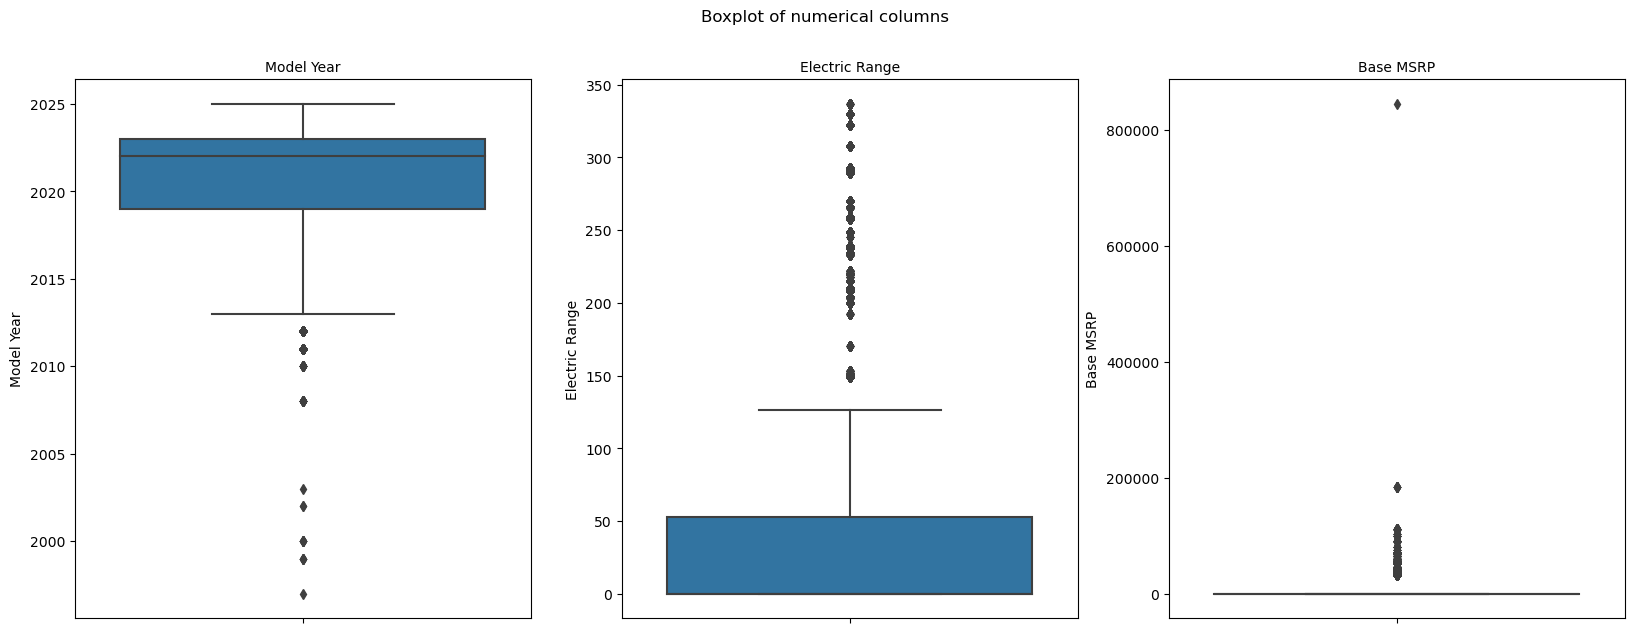

In [16]:
num_plots = len(numerical_cols)
fig, axes = plt.subplots(1, num_plots, figsize=(20, 7))
plt.suptitle('Boxplot of numerical columns', ha='center', fontsize='large')

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])

    axes[i].set_title(f'{col}', fontsize='medium')

In [17]:
def detect_outliers_zscore(data, threshold=3):
    """Detects outliers using z-scores."""
    z_scores = np.abs(stats.zscore(data))
    outliers = data[z_scores > threshold]
    return outliers

threshold = 3 # convention for z-score outliers

print("\n--- Outliers Before Handling ---")

for col in numerical_cols:
    outliers = detect_outliers_zscore(df_cleaned[col], threshold)  # calcualte z-score to get the outliers values
    num_outliers = len(outliers)
    outlier_percentage = (num_outliers / len(df_cleaned[col])) * 100    # portion of outliers
    print(f"{col}: {num_outliers} outliers ({outlier_percentage:.2f}%)")

# Replace outliers with the mean of the column
for col in numerical_cols:
    outliers = detect_outliers_zscore(df_cleaned[col], threshold)
    if not outliers.empty:
        df_cleaned.loc[outliers.index, col] = df_cleaned[col].mean()

print("\n--- Outliers After Handling ---")
for col in numerical_cols:
    outliers = detect_outliers_zscore(df_cleaned[col], threshold)    # portion of outliers
    num_outliers = len(outliers)
    outlier_percentage = (num_outliers / len(df_cleaned[col])) * 100
    print(f"{col}: {num_outliers} outliers ({outlier_percentage:.2f}%)")


--- Outliers Before Handling ---
Model Year: 781 outliers (0.39%)
Electric Range: 2142 outliers (1.07%)
Base MSRP: 3319 outliers (1.66%)

--- Outliers After Handling ---
Model Year: 1571 outliers (0.79%)
Electric Range: 504 outliers (0.25%)
Base MSRP: 3319 outliers (1.66%)


In [18]:
df_cleaned.describe()

,Model Year,Electric Range,Base MSRP
count,200040.000000,200040.000000,200040.000000
mean,2020.911205,50.589584,15.715004
std,2.924093,84.213794,120.986616
min,2012.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000
50%,2022.000000,0.000000,0.000000
75%,2023.000000,53.000000,0.000000
max,2025.000000,308.000000,947.161643


Still there are outliers, as the disctibution have changef. Practices to be made for future research:
1. Replace with the mean/median of the same column - repeat the process until there are no more outliers.
2. Remove the outlier values entirely - won't necessarily help in this case.
3. Replace with a statistically related value - say we look for high correlation with the target variable, we can impute with a more relevant value instead of mean.

### Step 4.3
### Correct Data Types: 
Ensure that each feature has the correct data type (e.g.,convert columns to categorical, datetime, etc.).

In [19]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        categorical_cols.append(col)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200040 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         200040 non-null  category
 1   County                                             200040 non-null  category
 2   City                                               200040 non-null  category
 3   State                                              200040 non-null  category
 4   Postal Code                                        200040 non-null  category
 5   Model Year                                         200040 non-null  int64   
 6   Make                                               200040 non-null  category
 7   Model                                              200040 non-null  category
 8   Electric Vehicle Type                              200040 non-null  c

### Step 4.4
### Handle Duplicates: 
Check for and remove duplicate records.

In [20]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(200040, 17)

## Step 5 - Univariate Analysis

### Step 5.1
Summary Statistics: Review measures of central tendency (mean, median) and dispersion (standard deviation, variance).

In [21]:
for col in numerical_cols:
    print(f'{col}\n min: {df_cleaned[col].min()}, max: {df_cleaned[col].max()}, mean: {df_cleaned[col].mean()}, median: {df_cleaned[col].median()}\n')

Model Year
 min: 2012.0, max: 2025.0, mean: 2020.911205324972, median: 2022.0

Electric Range
 min: 0.0, max: 308.0, mean: 50.58958359512861, median: 0.0

Base MSRP
 min: 0.0, max: 947.1616426714658, mean: 15.715004459241127, median: 0.0



### Step 5.2
Visualize Distributions: Use histograms, box plots, and bar charts to understand the distribution of individual variables.

In [22]:
print("Number of unique values in each column:")
for col in categorical_cols:
    print(f'{col}: {df_cleaned[col].nunique()}')

Number of unique values in each column:
VIN (1-10): 11978
County: 199
City: 763
State: 43
Postal Code: 917
Make: 42
Model: 151
Electric Vehicle Type: 2
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 3
Legislative District: 50
DOL Vehicle ID: 200040
Vehicle Location: 917
Electric Utility: 74
2020 Census Tract: 2161


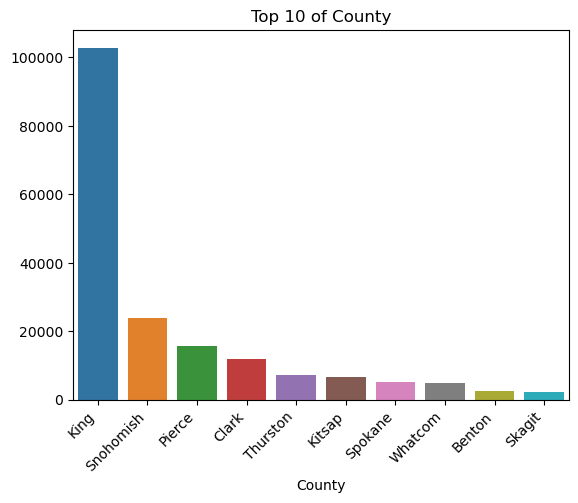

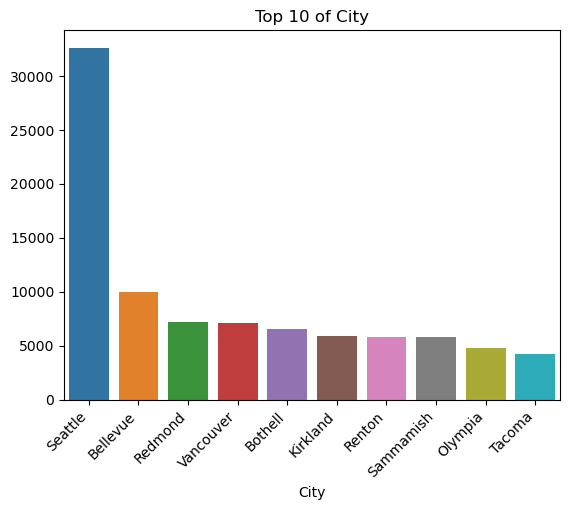

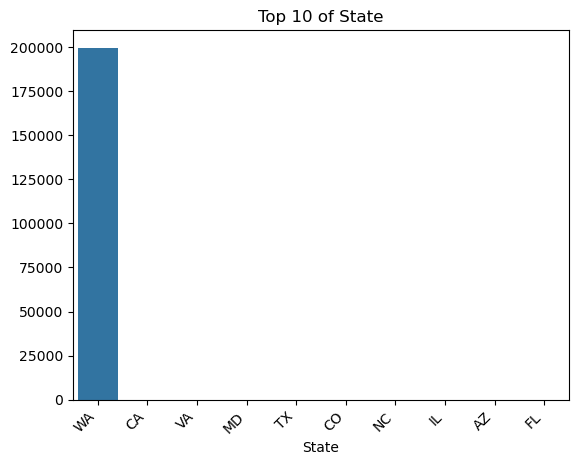

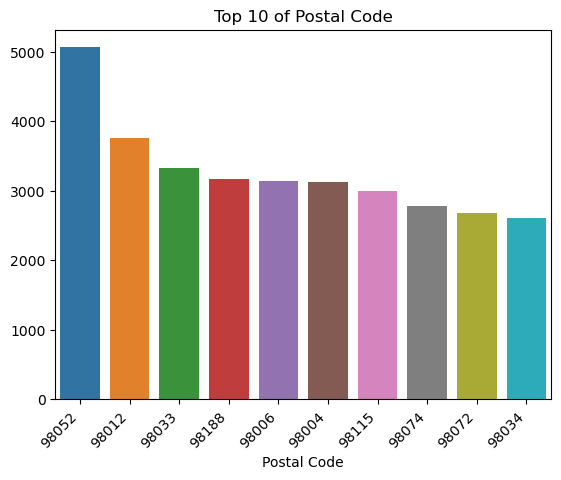

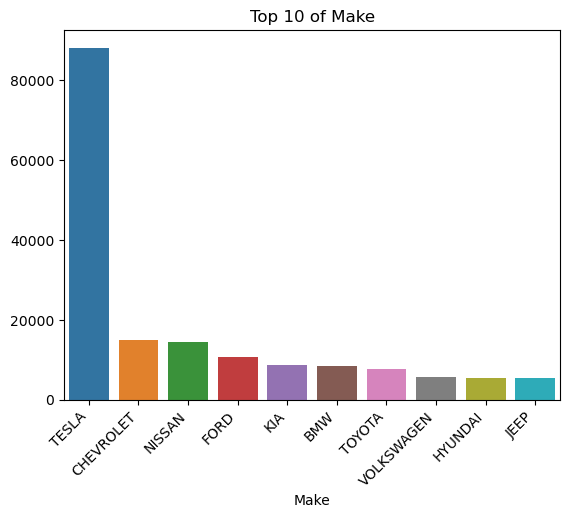

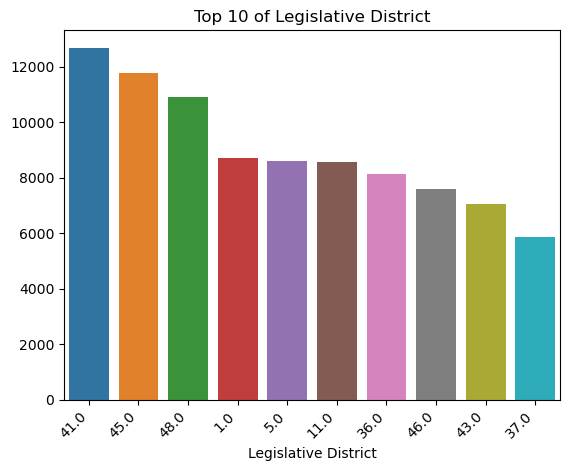

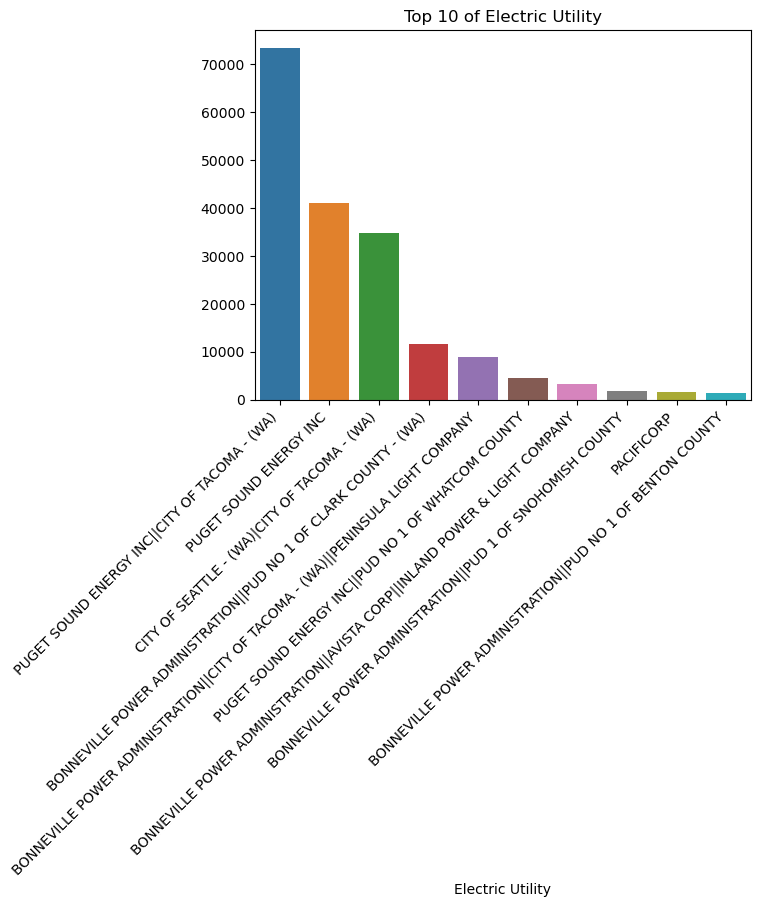

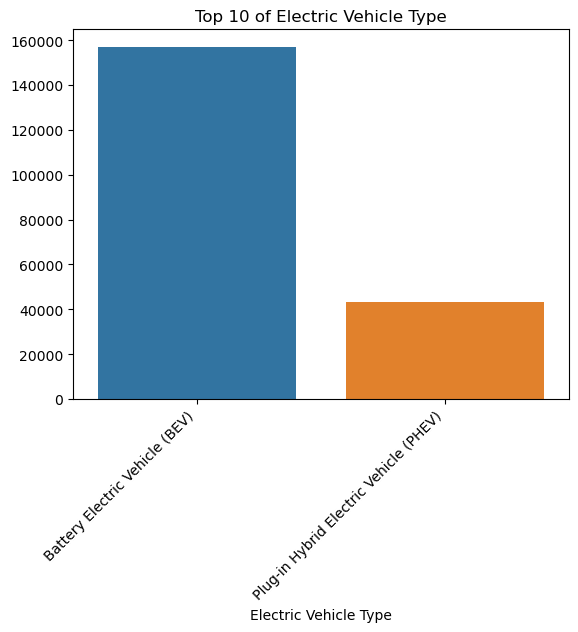

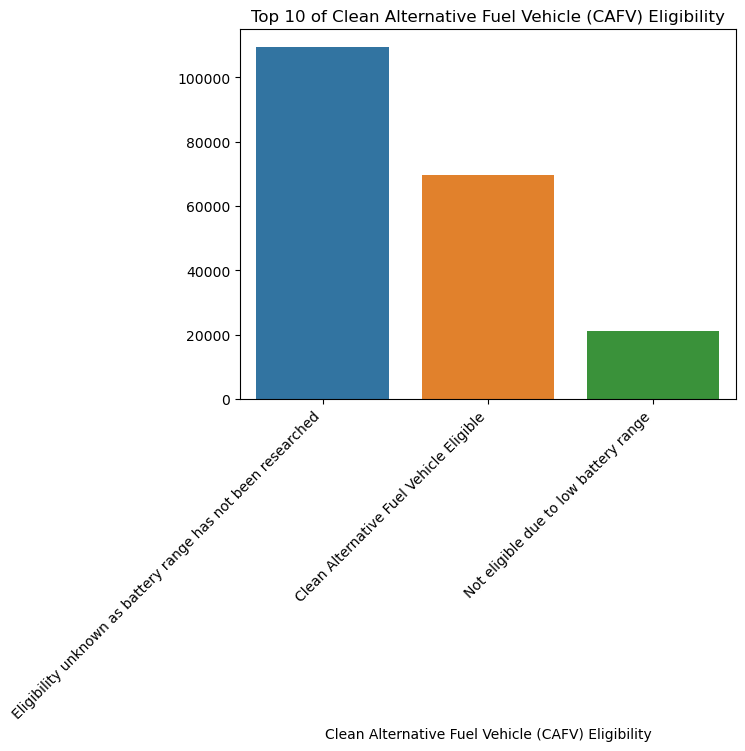

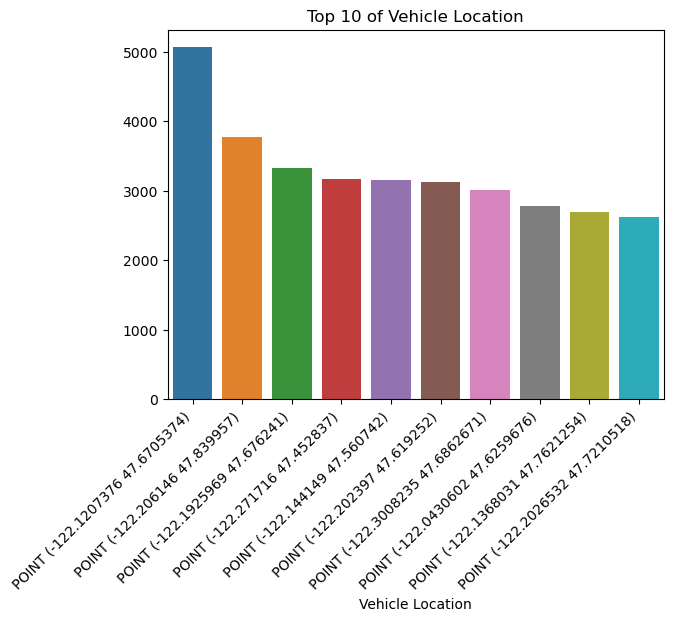

In [23]:
col_to_bar_chart = ['County', 'City', 'State', 'Postal Code', 'Make', 'Legislative District', 'Electric Utility', 'Electric Vehicle Type', 
                    'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location']


for i, col in enumerate(col_to_bar_chart):
    # get top 10 frequencies
    top_10_df = df_cleaned[col].value_counts().head(10)

    sns.barplot(x=top_10_df.index, y=top_10_df.values)
    plt.xticks(rotation=45, ha='right')  
    plt.title(f'Top 10 of {col}', fontsize=12)
    plt.show()

## Step 6 - Bivariate Analysis

### Step 6.1
Correlation Analysis: Calculate correlation coefficients (e.g., Pearson, Spearman) to understand relationships between numerical variables.

Text(0.5, 1.0, 'Correlation Matrix')

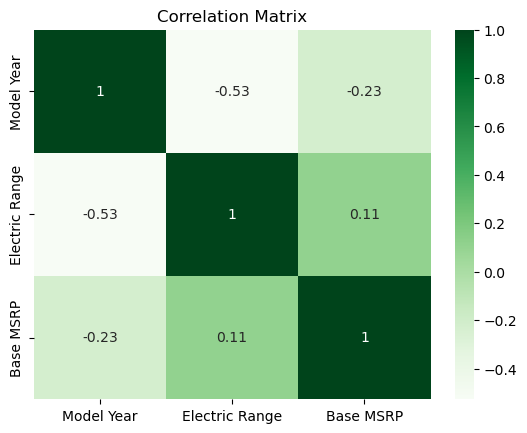

In [24]:
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='Greens').set_title('Correlation Matrix')

### Step 6.2
Cross-tabulation: Analyze relationships between categorical variables using crosstabs.

In [25]:
pd.crosstab(df_cleaned['State'], df['Make'])

Make,ACURA,ALFA ROMEO,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,DODGE,...,RIVIAN,ROLLS-ROYCE,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO,WHEEGO ELECTRIC CARS
State,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
AL,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,3,0,2,1,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
AZ,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,8,0,0,0,1,0
CA,0,0,1,0,0,3,0,1,7,0,...,2,0,0,0,62,0,5,5,1,0
CO,0,0,1,0,0,2,0,1,2,0,...,1,0,0,0,7,0,1,0,2,0
CT,0,0,0,0,0,0,0,1,3,0,...,0,0,0,0,3,0,1,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


We can infer that there are 2 big portions of Chevrolet and Tesla in WA as opposed to other types

In [26]:
pd.crosstab(df_cleaned['Make'], df_cleaned['Electric Vehicle Type'])

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Make,,
ACURA,15,0
ALFA ROMEO,0,64
AUDI,2520,1554
AZURE DYNAMICS,5,0
BENTLEY,0,5
BMW,3051,5243
CADILLAC,604,88
CHEVROLET,9975,4829
CHRYSLER,0,3620


* There are makers that have only BEV vehicles (in this dataset): Tesla, Nissan.
* There are makers that have only PHEV vehicles (in this dataset): JEEP (significantly), Chryzler, Dodge, and more.

In [27]:
pd.crosstab(df_cleaned['Make'], df_cleaned['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

Clean Alternative Fuel Vehicle (CAFV) Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
Make,,,
ACURA,0,15,0
ALFA ROMEO,64,0,0
AUDI,745,1775,1554
AZURE DYNAMICS,5,0,0
BENTLEY,0,0,5
BMW,3948,2484,1862
CADILLAC,88,604,0
CHEVROLET,9706,5098,0
CHRYSLER,3620,0,0


* It can be inferred Nissan and Tesla are the leaders in having clean energy.
* For Tesla, a big protion (relatively) of the data is Eligibility unknown as battery range has not been researched.
* Nothing outstanding related to "Not eligible due to low battery range". It can be assumed that low batterny range is not the main issue with eligibility.

### STEP 6.3
Visualize Relationships:
Scatter Plots: For numerical variables.
Box Plots and Violin Plots: To compare distributions across categories.
Heatmaps: To visualize correlations.

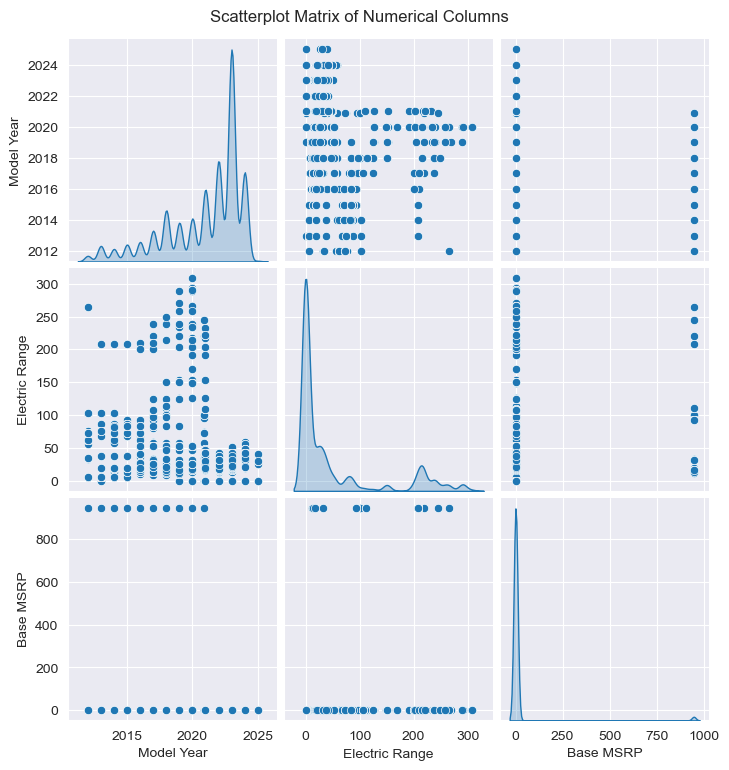

In [28]:
# Create scatterplots for each pair of numerical columns
sns.set_style(style="darkgrid")
sns.pairplot(df_cleaned, diag_kind='kde')
plt.suptitle("Scatterplot Matrix of Numerical Columns", y=1.02)
plt.show()


* By comparing distributions, we can see that non of them is normalized. 
* Not explicit correlation between pairs of numerical columns.

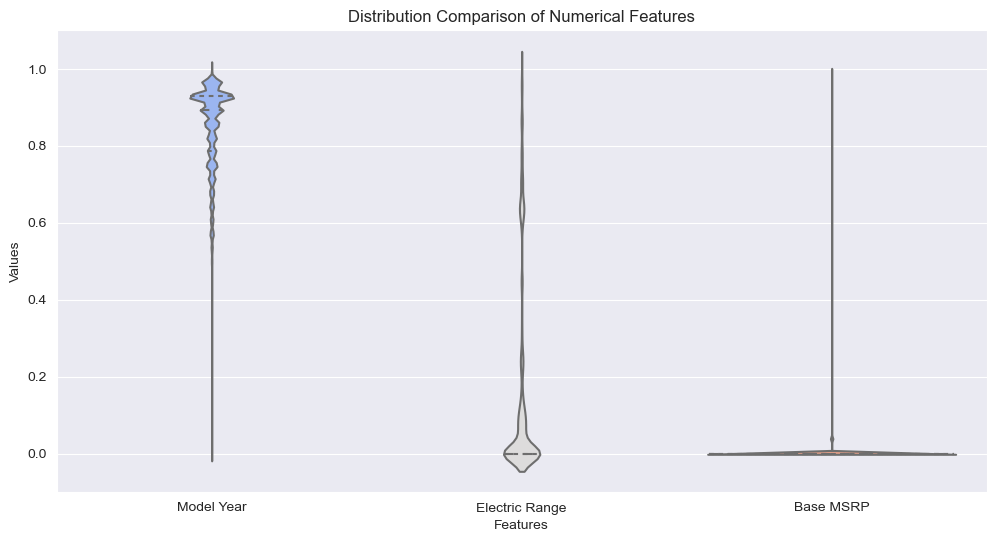

In [29]:
# Normalize numerical columns for better visuzalization of violin plots
scaler = MinMaxScaler()
df_scaled = df_cleaned
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_scaled, palette='coolwarm', inner='quartile')
plt.title('Distribution Comparison of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

* The values of `Base MSRP` and `Electric Range` mostly spread around 0.
* `Model Year` - most of the cars are newer, around 2023 accorind to the pairplot.

## Step 7
## Multivariate Analysis

## Step 8
## Feature Engineering

### Step 8.1
Create New Features: Based on domain knowledge or interaction terms.

Features we added:
- Is State WA
- Model Year Before 2020
- Top 6 Make
- Longitude, Latitude

In [ ]:
# is state WA indicator
df_scaled['Is State WA'] = df_scaled.apply(lambda x: 1 if x['State'] == 'WA' else 0, axis=1)

# sperare model year before and after 2020
df_scaled['Model Year Before 2020'] = df_scaled.apply(lambda x: 1 if x['Model Year'] < 2020 else 0, axis=1)

# indicate of a model is in the top 6 most popular models, since they cover 70% of the data
# get the top 5 models
top_6_models = df_scaled['Make'].value_counts().nlargest(6).index
df_scaled['Top 6 Make'] = df_scaled.apply(lambda x: x['Make'] if x['Make'] in top_6_models else 0, axis=1)

# seperate lat and long from 'Vehicle Location'
df_scaled[['Longitude', 'Latitude']] = df_scaled['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')

# Convert to float for numerical operations
df_scaled['Longitude'] = df_scaled['Longitude'].astype(float)
df_scaled['Latitude'] = df_scaled['Latitude'].astype(float)


In [31]:
# Check if the vehicle is in the state noted
# import geopandas as gpd
# import pandas as pd
# from shapely.geometry import Point

# # Load US state boundaries (GeoJSON or Shapefile)
# states = gpd.read_file("https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json")

# # Convert your DataFrame to GeoDataFrame
# temp_df = pd.DataFrame(df, columns=['Longitude', 'Latitude', 'State'])
# temp_df['geometry'] = temp_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
# geo_df = gpd.GeoDataFrame(temp_df, geometry='geometry', crs="EPSG:4326")

# # Standardize state names (if necessary)
# states = states.rename(columns={'NAME': 'State'})  # Rename to match your dataset

# # Perform spatial join to check if the point is in the correct state
# geo_df = gpd.sjoin(geo_df, states[['State', 'geometry']], how="left", predicate="within")

# # Create a new column to check if the state matches
# geo_df['In_Correct_State'] = geo_df['State_left'] == geo_df['State_right']

# # Drop unnecessary columns
# geo_df = geo_df.drop(columns=['State_right'])


In [ ]:
# show location on map
fig = px.scatter_mapbox(df_scaled[['Longitude', 'Latitude', 'City']], 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="City", 
                        mapbox_style="open-street-map", 
                        zoom=5)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0}, title_text="Distribution of Vehicle Locations")
fig.show()


KeyError: "['Longitude', 'Latitude'] not in index"

### Step 8.2
Feature Transformation: Normalize or standardize features, apply log transformations, etc.

In [35]:
df_scaled.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Age,Is State WA,Model Year Before 2020,Top 6 Make,Longitude,Latitude
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512,0.750000,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,53067012730,2024.250000,1,1,TESLA,-122.957046,46.991391
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367,0.857143,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,53035092901,2024.142857,1,1,0,-122.653005,47.473907
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902,0.750000,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,269374108,POINT (-120.530331 46.59534),PACIFICORP,53077000500,2024.250000,1,1,TESLA,-120.530331,46.595340
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902,0.892857,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,213383894,POINT (-120.530331 46.59534),PACIFICORP,53077001202,2024.107143,1,1,TESLA,-120.530331,46.595340
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012,0.928571,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,53061052009,2024.071429,1,1,TESLA,-122.206146,47.839957


In [ ]:
numerical_cols = ['Model Year', 'Electric Range', 'Base MSRP','2020 Census Tract','Longitude', 'Latitude'] # these will be normzalized
categorical_cols = ['County', 'City', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                    'Legislative District', 'Electric Utility', 'Top 6 Make']

bool_cols = ['Is State WA', 'Model Year Before 2020']

drop_cols = ['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', 'Make', 'Postal Code', 'State']

# define columns to normalize and convert to float
df_scaled[numerical_cols] = df_scaled[numerical_cols].astype('float64')

In [40]:
# Min-Max Scaling
scaler = MinMaxScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

In [41]:
df_scaled[numerical_cols].describe()

,Model Year,Electric Range,Base MSRP,2020 Census Tract,Longitude,Latitude
count,200040.000000,200040.000000,200040.000000,200040.000000,200040.000000,200040.000000
mean,0.852548,0.158707,0.001121,0.944646,0.423629,0.657954
std,0.106962,0.263461,0.009301,0.029183,0.020266,0.020225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.785714,0.000000,0.000000,0.945693,0.419437,0.656001
50%,0.892857,0.000000,0.000000,0.945693,0.420788,0.662217
75%,0.928571,0.157270,0.000000,0.946057,0.422345,0.664945
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# log-transform numerical columns
# assign scaled value
# df[numerical_cols] = df_scaled
# normalize numerical columns using log transformation
# df_scaled[col_to_normalize] = np.log1p(df[col_to_normalize])  # log1p(x) = log(1 + x), avoids log(0) error

std_scaler = StandardScaler()
df_scaled[numerical_cols] = std_scaler.fit_transform(df_scaled[numerical_cols])

df_scaled[numerical_cols].describe()

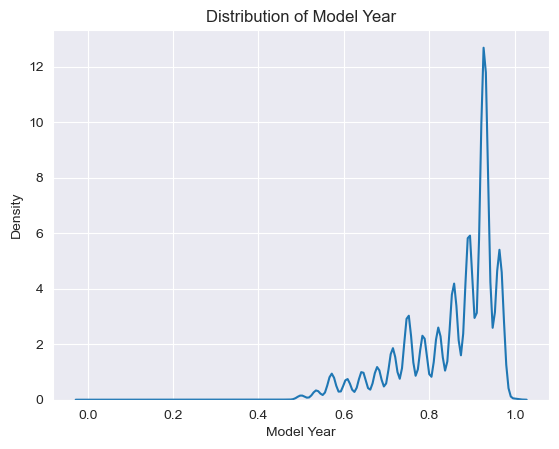

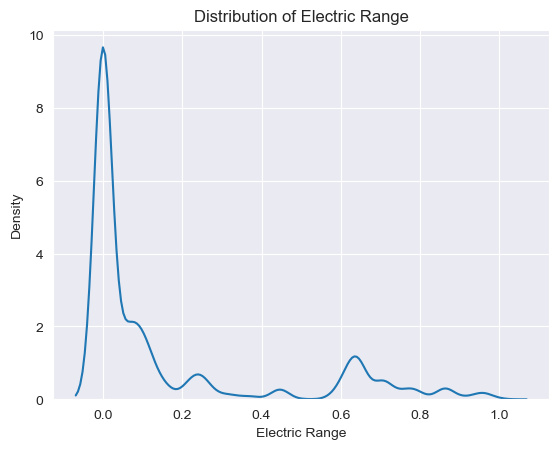

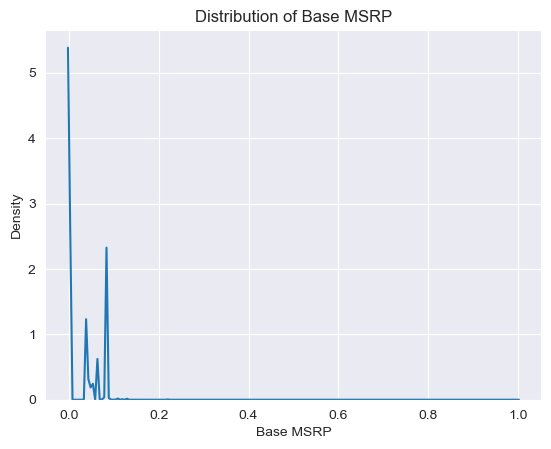

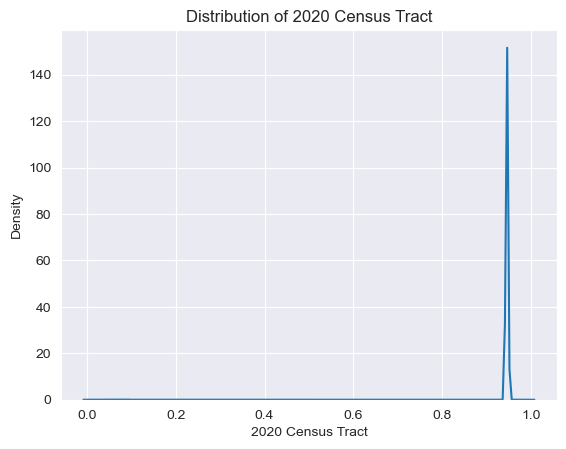

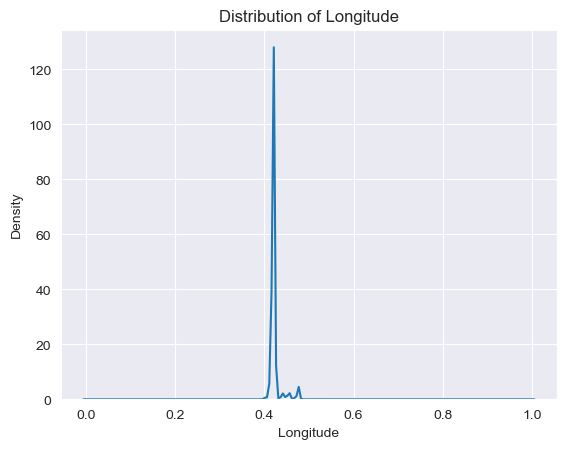

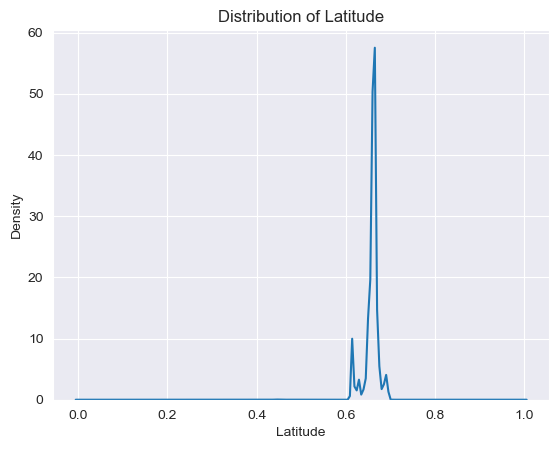

In [43]:
# plot the distribution of numerical columns
for col in numerical_cols:
    sns.kdeplot(df_scaled[col])
    plt.title(f'Distribution of {col}')
    plt.show()

As we can see, not all of the numerical features are in normal distribution. We though of some reasons for that:
1. Normalization relies on the data being approximately normally distributed to begin with. If the original data deviates significantly, the result might still not be normal.

2. Skewness - our data is skewed and it might persist. Positive skewness (tail to the right) and negative skewness (tail to the left) can prevent normality.

3. Kurtosis - Extreme kurtosis (thickness of the tails) can also prevent normality.

4. Outliers - as we suggested before, we can apply the practices to eliminate outliers.

5. Multimodal Distributions - we can see that as well in the data. These distribution cannot be normalized.

### Step 8.3
Encoding Categorical Variables: Convert categorical variables to numerical using techniques like one-hot encoding, label encoding, or frequency encoding.

In [45]:
fixed_df = df_scaled.drop(drop_cols, axis=1)

fixed_df = pd.get_dummies(fixed_df, columns=categorical_cols, drop_first=True)

In [50]:
fixed_df.shape

(200040, 1250)

### Step 8.4
Multivariate Statistics: Explore techniques like Principal Component Analysis (PCA) for dimensionality reduction.

In [56]:
# validate that no categorical features remain
print("Column types:")
print(fixed_df.dtypes.value_counts())

print("\nMissing values:")
print(fixed_df.isnull().any().sum())


Column types:
bool       1241
float64       7
int64         2
Name: count, dtype: int64

Missing values:
0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(fixed_df)
transformed_data = pca.transform(fixed_df)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

print(f"Number of components: {pca.n_components_}")

# Plot explained variance
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()

# Loading vectors
components = pca.components_

# Example: Visualize loadings for the first few components
num_components_to_visualize = min(5, pca.n_components_) #visualize up to 5 components.

for i in range(num_components_to_visualize):
    plt.figure()
    plt.bar(range(len(components[i])), components[i])
    plt.xlabel("Original Features")
    plt.ylabel("Loading Values")
    plt.title(f"Loading Vector for PC{i+1}")
    plt.show()

#Example: find the top 5 contributing features for the first few principal components.
for i in range(num_components_to_visualize):
    top_indices = np.argsort(np.abs(components[i]))[::-1][:5] #get the top 5 indices by absolute value.
    print(f"Top 5 contributing features for PC{i+1}: {top_indices}")

pca_df = pd.DataFrame(data=transformed_data, columns=[f"PC{i+1}" for i in range(pca.n_components_)])


Number of components: 160
